# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
Identifying which students might need early intervention is a classification problem because it aims to apply one of two discrete labels, likely to graduate or likely to fail.  If we wanted to predict student scores, a continuous variable, then the problem would be one of regression. 

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [8]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [9]:
#Let's take a peek at the data set
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [10]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1 #N-1 Features and 1 Target Label

# TODO: Calculate passing students
n_passed = student_data[student_data['passed']=='yes'].count()['passed']

# TODO: Calculate failing students
n_failed = student_data[student_data['passed']=='no'].count()['passed']

# TODO: Calculate graduation rate
grad_rate = float(n_passed)/n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [11]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [12]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split
# TODO: Set the number of training points
num_train = 300
# Set the number of testing points
num_test = X_all.shape[0] - num_train
# TODO: Shuffle and split the dataset into the number of training and testing points above

X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,train_size = num_train,random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
1. GaussianNB 

    One of the most well known applications of Naive Bayes is spam filtering.  Although Naive Bayes had been used for the purpose of spam filtering in academic circles before, it wasn't until the summer of 2002 when Paul Graham wrote about his success using Naive Bayes that the idea gained traction in industry.  By 2003, Graham had demonstrated that he could achieve false positive rates as low as 0.03%.<sup>1</sup>  
    
    Naive Bayes is efficient for training because it requires the calculation only of v\*n parameters, where n is the number of attributes, and v is the number of classification categories that V, the label, can take.<sup>2</sup>
    
    Potential weaknesses in this model stem from its assumption of conditional independence among the attributes in the data.  This makes naive bayes particularly ill suited for cases when there is a strong deviation from conditoinal independence, such as is in the case of XOR.<sup>2</sup>
    
    I chose GaussianNB for one of my models because it serves as a good standard by which to measure potential improvements offered by more sophisticated models.  Although one would expect some of the features in the data such as family educational support and home internet access to be correlated and, further, conditionally dependent, naive bayes has been found to work well even with strong dependencies because these dependencies may either be equally distributed among the classes(labels) or cancel each other out.<sup>3</sup>
    
2. Logistic Regression

    The logit model is used by some Ad-Tech companies like M6D to estimate the probability of a user performing a desired action after being shown an ad (referred to as a conversion).  Specifically, it is used to sort a set of opportunities to bid in order of most likely to convert to least likely to convert.<sup>4</sup>
    
    Logistic regression works well when interpretability is desired because the effect of each of the attributes may be extracted and interpreted with respect to the impact on the odds of a positive signal.
    
    The drawback of logistic regression is that it requires large sample sizes and correlation among the expanatory variables can cause problems with estimation of parameters.<sup>5</sup>
    
    This model is particularly well suited for binary classification problems such as the one presented here.  I also chose it because it is scalable and interpretable.<sup>4</sup>  Not only could it help detect high-risk students but it may enable decision makers to hone in on the most important predictors of success or, conversely, of imminent danger of failure.  Such insights could inform future policy directly.    
    
3. SVM

    SVMs have been successfully applied to the problem of optical character recognition.  Speciffically, one-against-all multiclass SVM models have been applied to recognize "the 10 numeral and 26 letters from Indian plates."<sup>6</sup>
    
    SVMs work well for binary classification problems, even with a small amounts of data.  Although a flaw in the opinion of some, SVMs give the user the flexibility to choose different kernels, which make them adaptable for data that may not be linearly separable.  SVMs are also know to be robust, that is, they provide good generalizability; this makes sense if one connsiders that the SVM algorithm maximizes the "margin" between the boundary and the data inherently. FInally, SVM's deliver globally optimal soultions because they rely on a convex optimization.<sup>7</sup> 
    
    As alluded to above, the lack of a good guiding principle for choosing a kernel function is one of the drawbacks of SVM's.  Further, slow training and testing, and the extensive dmemory requirements of the quadratic programming have been cited as major drawbacks.<sup>8</sup>
    
    SVM's are a good candiate for this problem because ththis is a binary classification problem for which there is a relatively small sample size of data avilable.  Algorithm complexity and memory demands may be an issue as the client seeks to keep costs to a minimum, however. 
    
References

<sup>1</sup>Paul Graham,http://www.paulgraham.com/better.html, Accessed July 15, 2017  
<sup>2</sup>*Bayesian Inference*, Udacity Machine Learning Nanodegree Notes  
<sup>3</sup>Zhang, Harry, The Optimality of Naive Bayes, University of New Brunswick, 2004  
<sup>4</sup>O'Neil, Cathy and Schutt, Rachel,**Doing Data Science:Straight Talk form the Frontline,Sebastopol**,CA,2014  
<sup>5</sup>Bewick, Cheek, Ball, Statistics Review 14: Logistic Regression,Published online Jan 13, 2005:https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1065119/  
<sup>6</sup>Thome,Antonio, SVM Classifiers- Co0ncepts and Applications to Character Recognition,Intech, 2012  
<sup>7</sup>Auria, Laura;Moro, Rouslan, Support Vector Machines as Technique for Solvency Analysis, Deutsches Institut fur Wirtschaftsforschung, 2008  
<sup>8</sup>Rifkin, R., G. Yeo, and T. Poggio. "Regularized Least Squares Classification. Advances in Learning Theory: Methods, Models and Applications, Eds. Suykens, Horvath, Basu, Micchelli, and Vandewalle, volume 190 of NATO Science Series III: Computer and Systems Sciences." (2003).p 392

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [14]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [15]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.naive_bayes import GaussianNB
# from sklearn import model_B
from sklearn.linear_model import LogisticRegression
# from skearln import model_C
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=0)
clf_C = SVC(random_state=0,decision_function_shape='ovr')

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
X_train_ary = [X_train_100,X_train_200,X_train_300]
y_train_ary = [y_train_100,y_train_200,y_train_300]
clf_ary = [clf_A,clf_B,clf_C]
for clf in clf_ary:
    for X_train_i,y_train_i in zip(X_train_ary,y_train_ary):
        train_predict(clf,X_train_i,y_train_i,X_test,y_test)


Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0210 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8550.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7481.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8321.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7132.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8088.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7500.
Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.6190 seconds
Made predictions in 0.0490 seconds.
F1 score for training set: 0.8571.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7612.
Training a LogisticRegression using a training set size of 200. . .
Trai

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.0020                 |  0.0010                      | 0.8550                  | 0.7481                |
| 200               |        0.0020          |     0.0010                   |    0.8321             |     0.7132|
| 300               |       0.0020                  |      0.0010                  |    0.8088   | 0.7500|

** Classifer 2 - Logistic Regression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |  0.1210                 |   0.0000     |  0.8571                |   0.7612              |
| 200               |  0.0030             |    0.0010           |  0.8380                |  0.7794               |
| 300               |  0.0030            |  0.0010            |   0.8381               |    0.7910    |

** Classifer 3 - SVC**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0000            |0.0016                  |  0.8591    |  0.7838               |
| 200               | 0.0000               |0.0000                   | 0.8693    |0.7755                 |
| 300               | 0.0002                 | 0.0020                  |0.8692           |0.7586                 |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

For the task of identifying students at risk of failing I would recommend the use of a logistic regression.  Logistic regressions offer probabilistic interpretability and, though they often require larger samples to perform adequately, in this case the logistic regression outperformed the other candidate algorithms in our preliminary tests.  Logistic regressions also have the benefit of scaling well, which should allay any concerns about cost if this algorithm were to be applied to larger data sets.  Finally, the prediction time of the algorithm is low because determination of the class may be calculated using a small set of parameters. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

The logistic regression is a form of a linear model, much like one which you would create in excel to find the line of best fit for data points on a scatterplot, that is trained to predict the probability that a student will pass the final exam, given all the data we know about her.  Further, the logistic regression gives us a parameter for each of the attributes of the student, which can be used to calculate how each attribute impacts the students' odds of passing.  In order to make a final prediction, the model uses the parameters, or coefficients as they are known in this case, that the model has learned to compute a final probability of passing.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [22]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Create the parameters list you wish to tune
parameters = {'C':np.arange(0.10,1.05,0.05),
             'fit_intercept':[True,False],
             'solver':['liblinear'],
             'class_weight':['balanced',None]}

# TODO: Initialize the classifier
clf = LogisticRegression(random_state=0,max_iter=500)
y_train.head()
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes') 

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,param_grid = parameters,scoring = f1_scorer,cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
print "Optimizing hyper-parameters"
grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print(grid_obj.best_params_)
# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Optimizing hyper-parameters
{'C': 0.20000000000000004, 'fit_intercept': True, 'solver': 'liblinear', 'class_weight': None}
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8294.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.7914.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The model's final testing F<sub>1</sub> score is negligibly different than the score we achieved at the preliminary phase while its training score decreased slightly from 0.84 to 0.83. At this time, the algorithm would probably benefit more from more data than further parameter tuning.  That said, I would not expect the out of sample performance to improve much beyond an F<sub>1</sub> score of 0.82; based on the model's learning curve, whose source code I quickly adapted from the Boston Housing project, the testing and training scores are already starting to converge (see below).

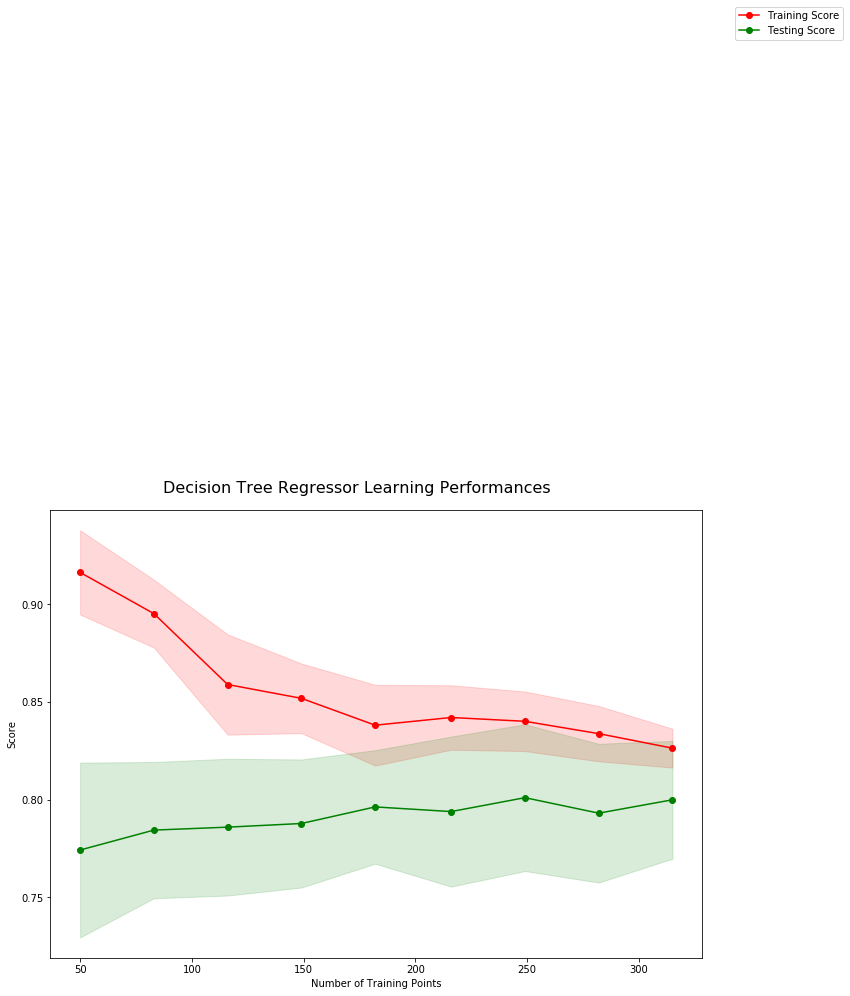

In [49]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.metrics import make_scorer


def ModelLearning(X, y,regressor):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(50, X.shape[0]*0.8 - 1, 9)).astype(int)
    # Create the figure window
    fig = pl.figure(figsize=(10,7))
    
    # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
        cv = cv, train_sizes = train_sizes, scoring = f1_scorer)

    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Subplot the learning curve 
    ax = fig.add_subplot(1,1,1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    ax.fill_between(sizes, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Labels
    #ax.set_title('max_depth = %s'%(depth))
    ax.set_xlabel('Number of Training Points')
    ax.set_ylabel('Score')
    #ax.set_xlim([0, X.shape[0]*0.8])
    #ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
ModelLearning(X_all,y_all,clf)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.